In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, LinearRegression, RidgeClassifier
from sklearn.tree import DecisionTreeClassifier
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
from sklearn import feature_extraction, linear_model, model_selection, preprocessing

In [47]:
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

In [48]:
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [49]:
df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

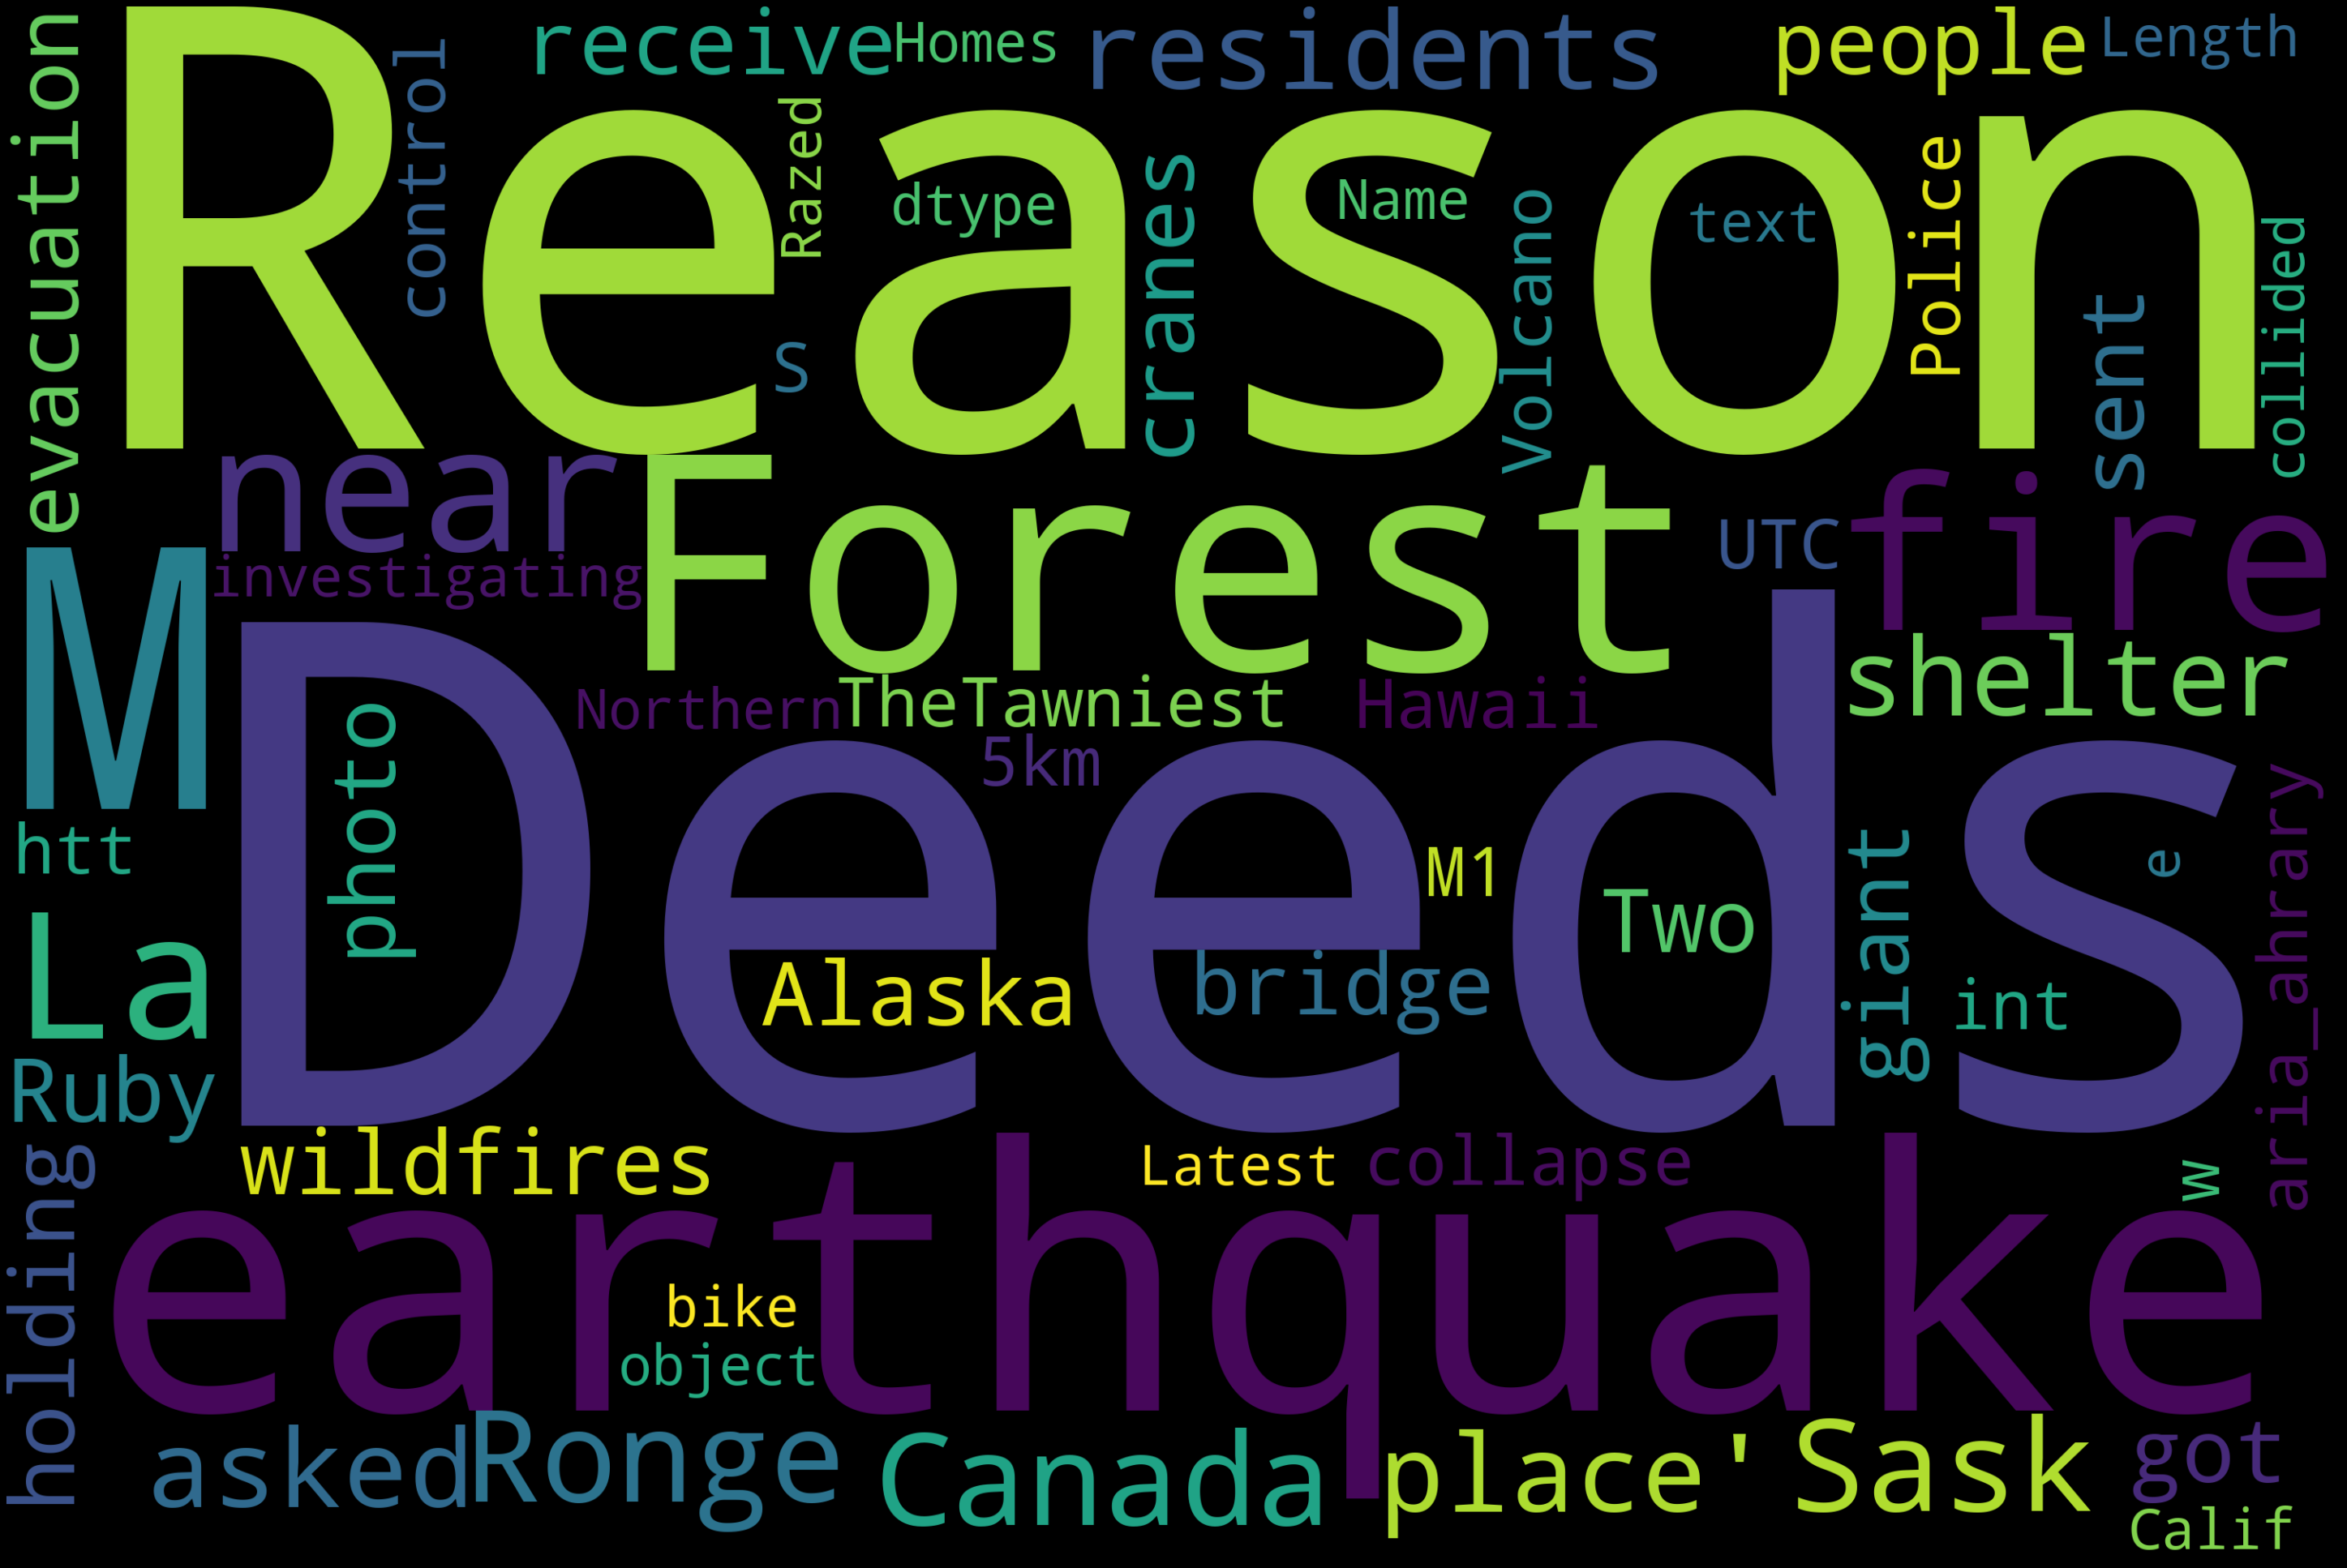

In [50]:
#Seeing which words are used more often based on how large they are.

text = df['text']
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [51]:
df.isnull().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [52]:
df.shape

(7613, 5)

In [53]:
cvec = CountVectorizer(stop_words='english',ngram_range=(1,3))

In [54]:
train_vectors = cvec.fit_transform(df['text'])

In [55]:
test_vectors = cvec.transform(test_df['text'])

In [56]:
rc = RidgeClassifier()

In [57]:
scores = cross_val_score(rc, train_vectors, df['target'], cv=5, scoring='f1')

In [58]:
scores

array([0.5383828 , 0.48308271, 0.52389706, 0.46595745, 0.66259808])

In [67]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [69]:
X = train_vectors
y = df['target']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=24, stratify=y)

In [71]:
lr = LogisticRegression()

In [79]:
lr_1_params = {
    
     'penalty': ['l1'],
     'C': [1, 1.5, 2, 2.5],
     'class_weight': ['balanced'],
     'warm_start': [True, False],
     'random_state': [24],
     'solver': ['liblinear']}
        
D = GridSearchCV(LogisticRegression(),
                 
                 lr_1_params,
                 cv = 5,
                 verbose = 1,
                 n_jobs = -1)
        
   
        
lr_2_params = {
    'penalty': ['l2'],
    'C': [1, 1.5, 2, 2.5],
    'class_weight': ['balanced'],
    'warm_start': [True, False],            
    'random_state': [24],
    'solver': ['lbfgs', 'liblinear']}
        
C = GridSearchCV(LogisticRegression(),
                    lr_2_params,
                    cv = 5,
                    verbose = 1,
                    n_jobs = -1)

In [80]:
D.fit(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:   21.6s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5], 'class_weight': ['balanced'],
                         'penalty': ['l1'], 'random_state': [24],
                         'solver': ['liblinear'], 'warm_start': [True, False]},
             verbose=1)

In [81]:
D.score(X_train, y_train)

0.8940269749518305

In [82]:
D.score(X_test,y_test)

0.7762605042016807

In [83]:
C.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:    9.8s
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed:   27.1s finished


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [1, 1.5, 2, 2.5], 'class_weight': ['balanced'],
                         'penalty': ['l2'], 'random_state': [24],
                         'solver': ['lbfgs', 'liblinear'],
                         'warm_start': [True, False]},
             verbose=1)

In [84]:
C.score(X_train,y_train)

0.9971974076020319

In [86]:
C.score(X_test, y_test)

0.7841386554621849

In [72]:
lr.fit(X_train, y_train)

LogisticRegression()

In [73]:
lr.score(X_train, y_train)

0.9947451392538098

In [74]:
lr.score(X_test,y_test)

0.7794117647058824

In [87]:
grid = GridSearchCV(estimator=DecisionTreeClassifier(), param_grid =
                   {
                       'max_depth' : [None, 3, 5, 7, 10],
                       'min_samples_split' : [2,5, 10, 15, 20],
                       'min_samples_leaf' : [2, 3, 4, 5, 6, 7]
                   },
                   cv = 5, verbose=1, n_jobs=-1)

In [88]:
grid.fit(X_train, y_train)

Fitting 5 folds for each of 150 candidates, totalling 750 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 426 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 750 out of 750 | elapsed:  2.1min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [None, 3, 5, 7, 10],
                         'min_samples_leaf': [2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 5, 10, 15, 20]},
             verbose=1)

In [89]:
grid.score(X_train, y_train)

0.8393764231914521

In [90]:
grid.score(X_test,y_test)

0.7384453781512605

In [59]:
rc.fit(train_vectors, df['target'])

RidgeClassifier()

In [60]:
rc.score(train_vectors, df['target'])

0.9963220806515172

In [61]:
sample_submission = pd.read_csv("sample_submission.csv")

In [62]:
sample_submission['target'] = rc.predict(test_vectors)

In [63]:
sample_submission.head()

,id,target
0,0,0
1,2,1
2,3,1
3,9,0
4,11,1


In [64]:
sample_submission.to_csv('kaggle_submission.csv', index=False)